<a href="https://colab.research.google.com/github/HiraY32/HiraY32/blob/main/25_5_22_S22_capm2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 11.0 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
import yfinance as yf

In [3]:
NIFTY=yf.Ticker('^NSEI')

In [4]:
KOTAKBANK=yf.Ticker('KOTAKBANK.NS')

In [5]:
NIFTY_d=NIFTY.history(period='10y',auto_adjust="True")['Close']
KOTAKBANK_d=KOTAKBANK.history(period='10y',auto_adjust="True")['Close']

In [6]:
NIFTY_m=NIFTY_d.resample('1M').last()
KOTAKBANK_m=KOTAKBANK_d.resample('1M').last()

In [7]:
NIFTY_mr=NIFTY_m.pct_change().dropna()
KOTAKBANK_mr=KOTAKBANK_m.pct_change().dropna()

In [8]:
import pandas as pd

In [9]:
NK_dt=pd.merge(NIFTY_mr,KOTAKBANK_mr,on='Date')
NK_dt.head()

,Close_x,Close_y
Date,,
2012-06-30,0.072021,0.051109
2012-07-31,-0.009453,-0.094570
2012-08-31,0.005642,0.071582
2012-09-30,0.084587,0.130030
2012-10-31,-0.014658,-0.069364


In [10]:
NK_dt.rename(columns={'Close_x':'NIFTY_mr','Close_y':'KOTAKBANK_mr'},inplace=True)

In [11]:
NK_dt

,NIFTY_mr,KOTAKBANK_mr
Date,,
2012-06-30,0.072021,0.051109
2012-07-31,-0.009453,-0.094570
2012-08-31,0.005642,0.071582
2012-09-30,0.084587,0.130030
2012-10-31,-0.014658,-0.069364
...,...,...
2022-01-31,-0.000818,0.034046
2022-02-28,-0.031485,-0.007807
2022-03-31,0.039946,-0.048243


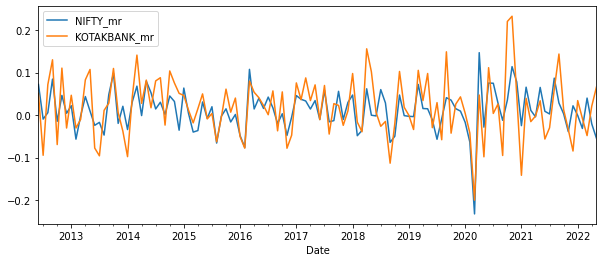

In [12]:
NK_dt.plot(figsize=(10,4))

In [13]:
train_dt=NK_dt[:-12].dropna()
test_dt=NK_dt[-12:].dropna()

In [14]:
train_dt.head()

,NIFTY_mr,KOTAKBANK_mr
Date,,
2012-06-30,0.072021,0.051109
2012-07-31,-0.009453,-0.094570
2012-08-31,0.005642,0.071582
2012-09-30,0.084587,0.130030
2012-10-31,-0.014658,-0.069364


Now we will use train data for analysis

first we will use adf test to check the stationarity of the data

In [15]:
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [16]:
print('NIFTY_mr')
adfuller(NK_dt.NIFTY_mr)[1]

NIFTY_mr


3.336371252351134e-21

In [17]:
NIFTY_mr1=adfuller(NK_dt.NIFTY_mr.diff().dropna())[1]
NIFTY_mr1

7.89142440331072e-08

In [18]:
print('KOTAKBANK_mr')
adfuller(NK_dt.KOTAKBANK_mr)[1]


KOTAKBANK_mr


1.9589194092380086e-06

In [19]:
KOTAKBANK_mr1=adfuller(NK_dt.KOTAKBANK_mr.diff().dropna())[1]
KOTAKBANK_mr1

8.311400551938835e-07

In [20]:
train_dt1=train_dt.diff().dropna()
train_dt1.head()

,NIFTY_mr,KOTAKBANK_mr
Date,,
2012-07-31,-0.081474,-0.145679
2012-08-31,0.015094,0.166152
2012-09-30,0.078945,0.058448
2012-10-31,-0.099245,-0.199394
2012-11-30,0.060951,0.179840


In [21]:
from statsmodels.tsa.api import VAR

In [22]:
model=VAR(train_dt1)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [23]:
result=model.select_order(maxlags=12)

In [24]:
print(result.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -10.51      -10.46   2.725e-05      -10.49
1       -10.97      -10.81   1.727e-05      -10.90
2       -11.07      -10.81   1.552e-05      -10.97
3       -11.31     -10.93*   1.226e-05      -11.16
4       -11.30      -10.81   1.242e-05      -11.10
5       -11.33      -10.74   1.202e-05      -11.09
6       -11.44      -10.74   1.084e-05      -11.15
7       -11.66      -10.86   8.655e-06      -11.34
8       -11.71      -10.80   8.270e-06     -11.34*
9       -11.74      -10.71   8.093e-06      -11.32
10     -11.76*      -10.63  7.908e-06*      -11.31
11      -11.68      -10.45   8.590e-06      -11.18
12      -11.66      -10.32   8.832e-06      -11.12
--------------------------------------------------


In [25]:
from statsmodels.tsa.statespace.varmax import VARMAX

In [26]:
VARMAX_model=VARMAX(train_dt,order=(3,0),enforce_stationarity=False)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [27]:
VARMAX_result=VARMAX_model.fit(disp=False)

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [28]:
print(VARMAX_result.summary())

                                Statespace Model Results                                
Dep. Variable:     ['NIFTY_mr', 'KOTAKBANK_mr']   No. Observations:                  108
Model:                                   VAR(3)   Log Likelihood                 347.304
                                    + intercept   AIC                           -660.608
Date:                          Thu, 26 May 2022   BIC                           -615.012
Time:                                  11:00:19   HQIC                          -642.120
Sample:                              06-30-2012                                         
                                   - 05-31-2021                                         
Covariance Type:                            opg                                         
Ljung-Box (Q):                26.20, 23.92   Jarque-Bera (JB):         149.35, 2.36
Prob(Q):                        0.95, 0.98   Prob(JB):                   0.00, 0.31
Heteroskedasticity (H):        

In [29]:
n_forecast=12
predict=VARMAX_result.get_prediction(start=len(train_dt),end=len(train_dt)+n_forecast-1)

In [30]:
predictions=predict.predicted_mean

In [31]:
predictions.columns=[['NIFTY_mr_Predicted','KOTAKBANK_mr_Predicted']]
predictions

,NIFTY_mr_Predicted,KOTAKBANK_mr_Predicted
2021-06-30,0.009681,0.025974
2021-07-31,0.013508,0.029945
2021-08-31,0.016178,0.025789
2021-09-30,0.010377,0.016062
2021-10-31,0.011032,0.017396
2021-11-30,0.012070,0.019871
2021-12-31,0.012231,0.021439
2022-01-31,0.012120,0.020901
2022-02-28,0.011913,0.020134
2022-03-31,0.011813,0.019773


In [32]:
test_dt

,NIFTY_mr,KOTAKBANK_mr
Date,,
2021-06-30,0.008901,-0.056342
2021-07-31,0.002643,-0.029926
2021-08-31,0.086858,0.060292
2021-09-30,0.028365,0.143582
2021-10-31,0.003037,0.012790
2021-11-30,-0.038958,-0.034094
2021-12-31,0.021836,-0.084510
2022-01-31,-0.000818,0.034046
2022-02-28,-0.031485,-0.007807


In [33]:
TvP=pd.concat([test_dt,predictions],axis=1)

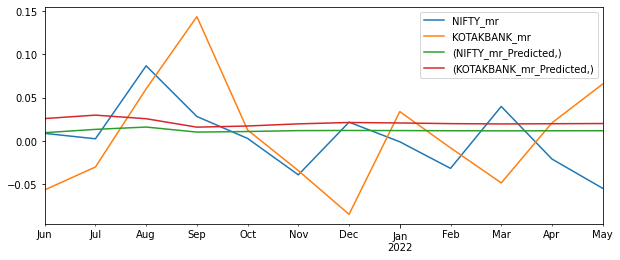

In [34]:
TvP.plot(figsize=(10,4))